##### Library Import
* Keras
* Keras Preprocessing
* Keras Models
* Keras Layers

In [2]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

##### Validate GPU accessibility

In [4]:
# Test to Validate Tensorflow can access GPU
from tensorflow.python.client import device_lib
assert 'GPU' in str(device_lib.list_local_devices())

# Test to Validate Keras can access GPU
from keras import backend
assert len(backend.tensorflow_backend._get_available_gpus()) > 0

##### Hyperparameter Setup

In [6]:
batch_size = 32
num_classes = 10
epochs = 25
data_augmentation = False

In [7]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples

In [8]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


In [10]:
model.summary()

_________________________________________________________________
Layer (type) Output Shape Param # 
=================================================================
conv2d_21 (Conv2D) (None, 32, 32, 32) 896 
_________________________________________________________________
activation_31 (Activation) (None, 32, 32, 32) 0 
_________________________________________________________________
conv2d_22 (Conv2D) (None, 30, 30, 32) 9248 
_________________________________________________________________
activation_32 (Activation) (None, 30, 30, 32) 0 
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 15, 15, 32) 0 
_________________________________________________________________
dropout_16 (Dropout) (None, 15, 15, 32) 0 
_________________________________________________________________
conv2d_23 (Conv2D) (None, 15, 15, 64) 18496 
_________________________________________________________________
activation_33 (Activation) (None, 15, 15, 64) 0 
_________________________________________________________________
conv2d_24 (Conv2D) (None, 13, 13, 64) 36928 
_________________________________________________________________
activation_34 (Activation) (None, 13, 13, 64) 0 
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 64) 0 
_________________________________________________________________
dropout_17 (Dropout) (None, 6, 6, 64) 0 
_________________________________________________________________
flatten_6 (Flatten) (None, 2304) 0 
_________________________________________________________________
dense_11 (Dense) (None, 512) 1180160 
_________________________________________________________________
activation_35 (Activation) (None, 512) 0 
_________________________________________________________________
dropout_18 (Dropout) (None, 512) 0 
_________________________________________________________________
dense_12 (Dense) (None, 10) 5130 
_________________________________________________________________
activation_36 (Activation) (None, 10) 0 
=================================================================
Total params: 1,250,858
Trainable params: 1,250,858
Non-trainable params: 0
_________________________________________________________________

In [11]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [12]:
## Add History Callback to capture training metrics
from keras.callbacks import History 
history = History()

In [13]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True,
             callbacks=[history])
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=x_train.shape[0] // batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                         callbacks=[history])

Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/25

 32/50000 [..............................] - ETA: 14:05 - loss: 2.3273 - acc: 0.0938
 160/50000 [..............................] - ETA: 3:05 - loss: 2.3119 - acc: 0.0938 
 288/50000 [..............................] - ETA: 1:52 - loss: 2.3083 - acc: 0.0903
 416/50000 [..............................] - ETA: 1:23 - loss: 2.3068 - acc: 0.0913
 576/50000 [..............................] - ETA: 1:05 - loss: 2.3070 - acc: 0.0972
 736/50000 [..............................] - ETA: 55s - loss: 2.3051 - acc: 0.1005 
 896/50000 [..............................] - ETA: 48s - loss: 2.3037 - acc: 0.1016
 1056/50000 [..............................] - ETA: 43s - loss: 2.3048 - acc: 0.1004
 1216/50000 [..............................] - ETA: 40s - loss: 2.3027 - acc: 0.1069
 1376/50000 [..............................] - ETA: 37s - loss: 2.3027 - acc: 0.1025
 1536/50000 [..............................] - ETA: 35s - loss: 2.3012 - acc: 0.1061
 1696/50000 [>.............................] - ETA: 33s - loss: 2.3012 - acc: 0.1097
 1856/50000 [>.............................] - ETA: 31s - loss: 2.3008 - acc: 0.1137
 2016/50000 [>.............................] - ETA: 30s - loss: 2.2997 - acc: 0.1131
 2176/50000 [>.............................] - ETA: 29s - loss: 2.2991 - acc: 0.1158
 2336/50000 [>.............................] - ETA: 28s - loss: 2.2977 - acc: 0.1164
 2496/50000 [>.............................] - ETA: 27s - loss: 2.2956 - acc: 0.1218
 2656/50000 [>.............................] - ETA: 26s - loss: 2.2946 - acc: 0.1212
 2816/50000 [>.............................] - ETA: 25s - loss: 2.2923 - acc: 0.1232
 2976/50000 [>.............................] - ETA: 24s - loss: 2.2901 - acc: 0.1267
 3136/50000 [>.............................] - ETA: 24s - loss: 2.2881 - acc: 0.1266
 3296/50000 [>.............................] - ETA: 23s - loss: 2.2859 - acc: 0.1280
 3456/50000 [=>............................] - ETA: 23s - loss: 2.2828 - acc: 0.1291
 3616/50000 [=>............................] - ETA: 22s - loss: 2.2791 - acc: 0.1311
 3776/50000 [=>............................] - ETA: 22s - loss: 2.2751 - acc: 0.1343
 3936/50000 [=>............................] - ETA: 22s - loss: 2.2704 - acc: 0.1372
 4096/50000 [=>............................] - ETA: 21s - loss: 2.2684 - acc: 0.1389
 4256/50000 [=>............................] - ETA: 21s - loss: 2.2646 - acc: 0.1414
 4416/50000 [=>............................] - ETA: 21s - loss: 2.2607 - acc: 0.1447
 4576/50000 [=>............................] - ETA: 20s - loss: 2.2544 - acc: 0.1490
 4736/50000 [=>............................] - ETA: 20s - loss: 2.2516 - acc: 0.1512
 4896/50000 [=>............................] - ETA: 20s - loss: 2.2474 - acc: 0.1528
 5056/50000 [==>...........................] - ETA: 19s - loss: 2.2436 - acc: 0.1545
 5216/50000 [==>...........................] - ETA: 19s - loss: 2.2378 - acc: 0.1584
 5376/50000 [==>...........................] - ETA: 19s - loss: 2.2337 - acc: 0.1615
 5536/50000 [==>...........................] - ETA: 19s - loss: 2.2308 - acc: 0.1637
 5696/50000 [==>...........................] - ETA: 19s - loss: 2.2258 - acc: 0.1657
 5856/50000 [==>...........................] - ETA: 18s - loss: 2.2196 - acc: 0.1691
 6016/50000 [==>...........................] - ETA: 18s - loss: 2.2157 - acc: 0.1689
 6176/50000 [==>...........................] - ETA: 18s - loss: 2.2097 - acc: 0.1718
 6336/50000 [==>...........................] - ETA: 18s - loss: 2.2044 - acc: 0.1741
 6496/50000 [==>...........................] - ETA: 18s - loss: 2.1988 - acc: 0.1753
 6656/50000 [==>...........................] - ETA: 17s - loss: 2.1943 - acc: 0.1779
 6816/50000 [===>..........................] - ETA: 17s - loss: 2.1908 - acc: 0.1806
 6976/50000 [===>..........................] - ETA: 17s - loss: 2.1858 - acc: 0.1823
 7136/50000 [===>..........................] - ETA: 17s - loss: 2.1813 - acc: 0.1843

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6862234663963318
Test accuracy: 0.7624

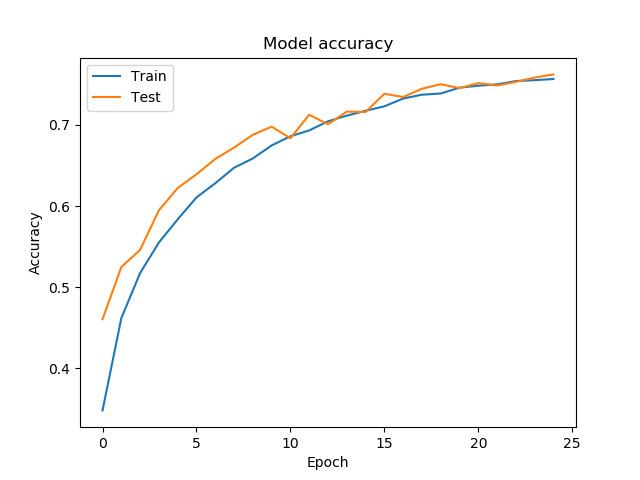

In [15]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.clf()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
pltoutput1 = plt.show()
display(pltoutput)


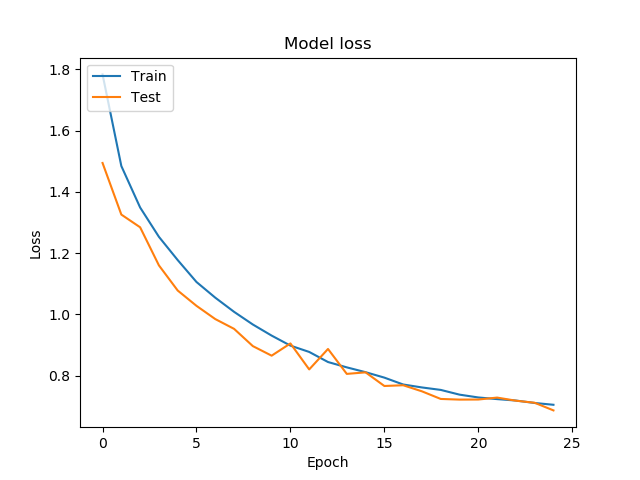

In [16]:
plt.clf()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
pltoutput = plt.show()
display(pltoutput)

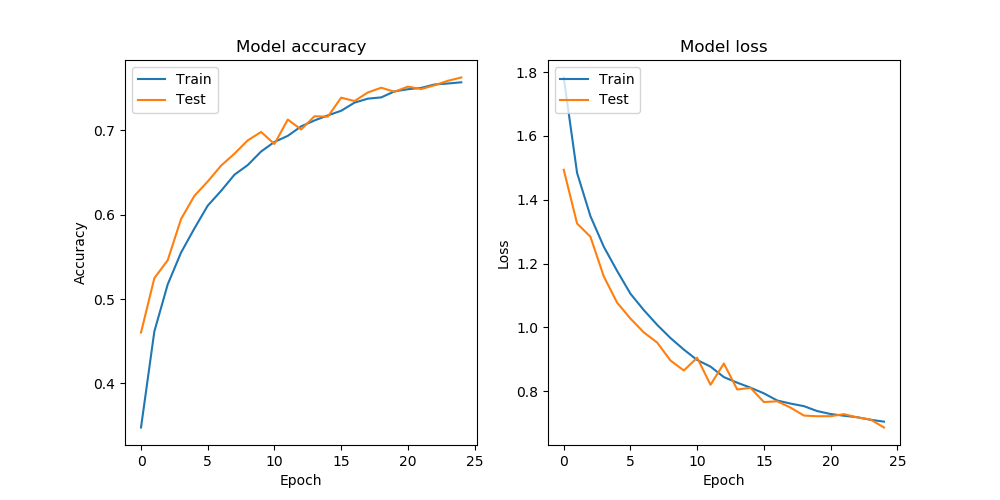

In [17]:
width = 10
height = 5
plt.figure(figsize=(width, height))
plt.title('Model Metrics : Non Augmented Data')
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

pltoutput = plt.show()
display(pltoutput)